In [1]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakNet
from nodes.core import layer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = layer()
foldiaklayer = layer()

for i in range(16):
    foldiaklayer.append(FoldiakNode(0.5))
for i in range(784):
    #I really need a way to make layers able to store multidimensional arrays; eventually, this would be an 8x8 (or larger)
    #Actually, lets do 28x28 so I can run MNIST through this
    inputlayer.append(InputNode(0))
    
network = FoldiakNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_layer_hebbian(inputlayer, foldiaklayer)
network.connect_self_antihebbian(foldiaklayer)

In [2]:
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))

In [3]:
network.foldiaksetup()

In [4]:
vals = []
for i in range(100):
    vals.append(foldiaklayer.nodes[2].val)
    network.foldiakupdate()

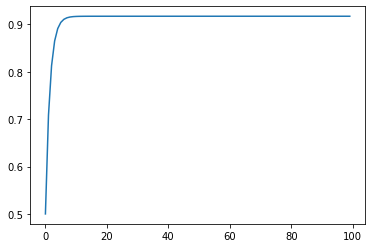

In [5]:
plt.plot(vals)
plt.show()

In [6]:
def setbiases(x,y,bias):
    for i in network.connects:
        if (i.input is foldiaklayer.nodes[x]) & (i.output is foldiaklayer.nodes[y]):
            i.bias = bias
        if (i.input is foldiaklayer.nodes[y]) & (i.output is foldiaklayer.nodes[x]):
            i.bias = bias

In [147]:
for i in range(10):
    setbiases(random.choice(range(10)),
             random.choice(range(10)),
             random.uniform(-2,0))
    setbiases(random.choice(range(10)),
             random.choice(range(10)),
             0.0)

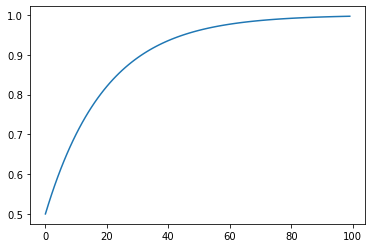

In [148]:
network.foldiaksetup()
vals = []
for i in range(100):
    vals.append(foldiaklayer.nodes[2].val)
    network.foldiakupdate()

plt.plot(vals)
plt.show()

In [149]:
for i in range(100):
    network.update()

In [150]:
for j in range(100):
    for i in network.connects:
        i.update()

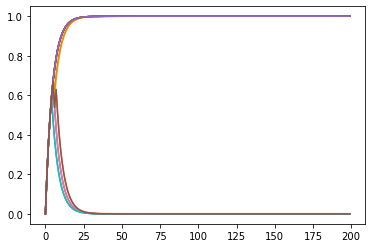

In [177]:
network.setparam("dt",0.05)
network.setparam("l",5)
starty = 0.0


network.foldiaksetup()

for i in network.diffeqs:
    i.yi = starty
    i.pushval()

vals = []

for i in foldiaklayer.nodes:
    vals.append([])

for i in range(200):
    for i in network.diffeqs:
        i.dt = 0.2
    for i in range(len(foldiaklayer.nodes)):
        vals[i].append(foldiaklayer.nodes[i].val)
    network.foldiakupdate()
    
    
for i in vals:
    plt.plot(i)
plt.show()